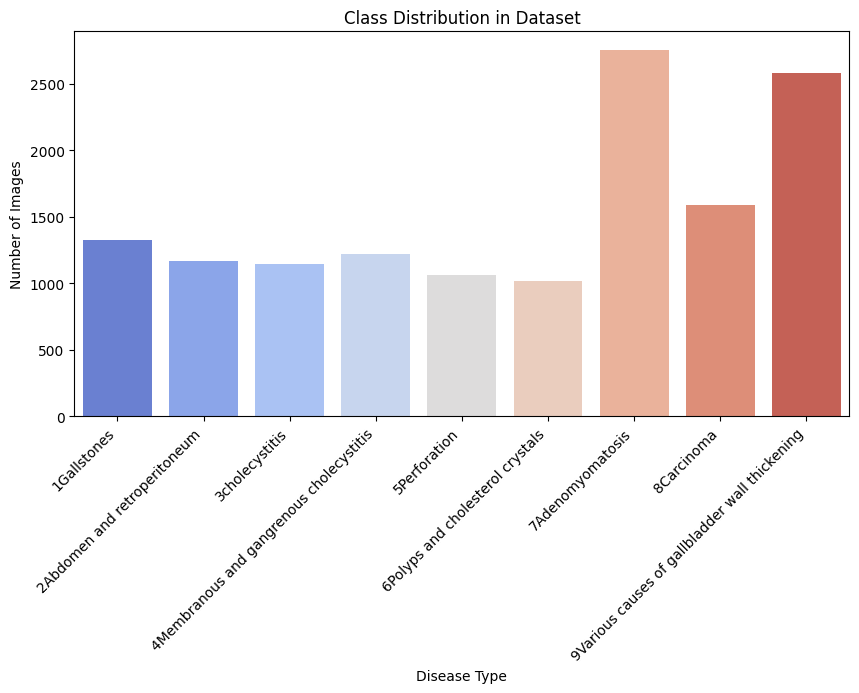

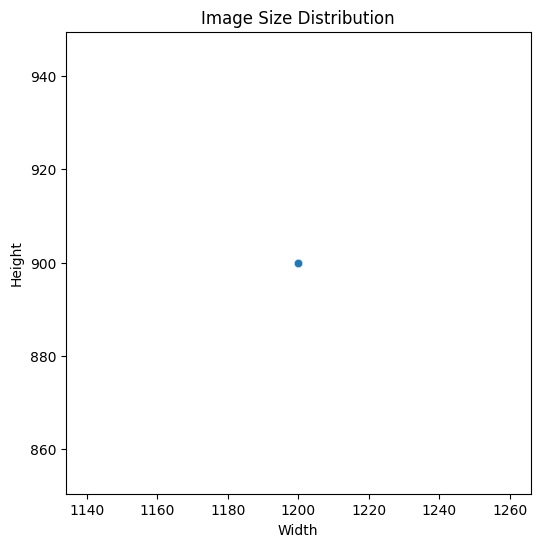

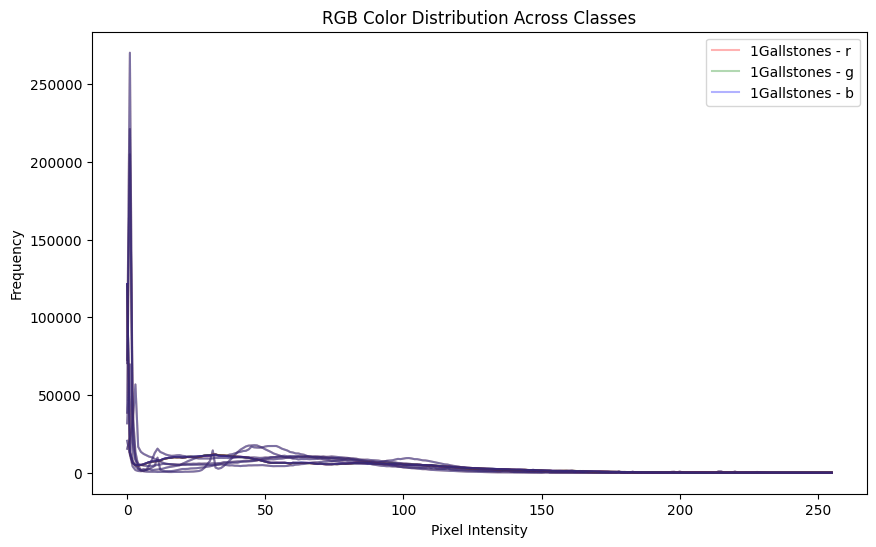

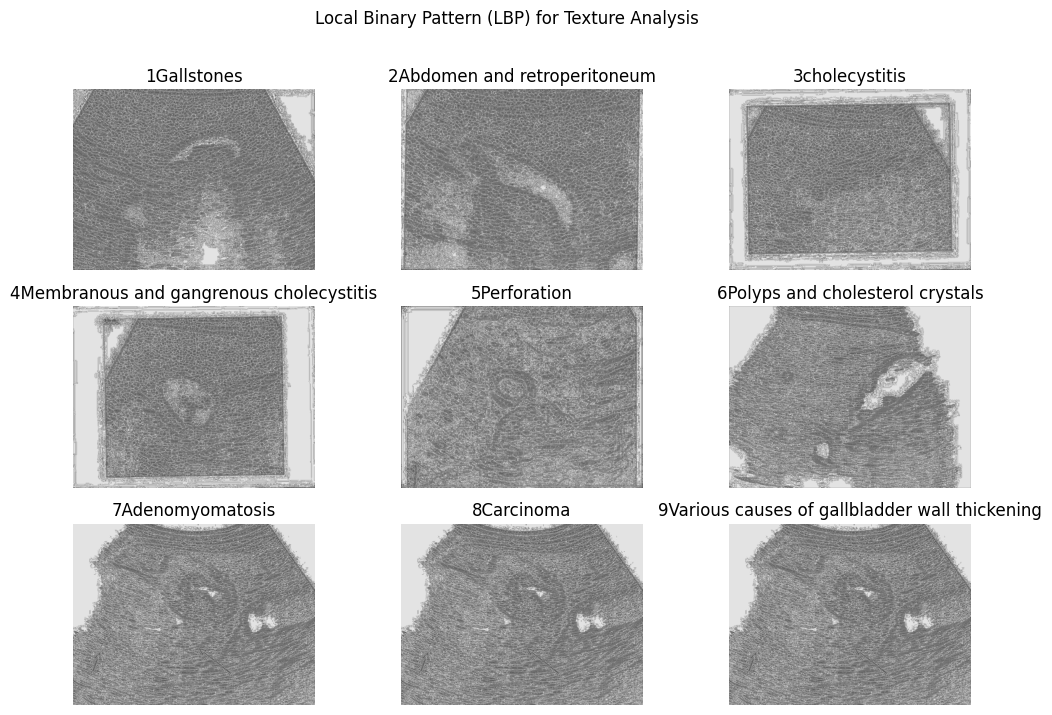

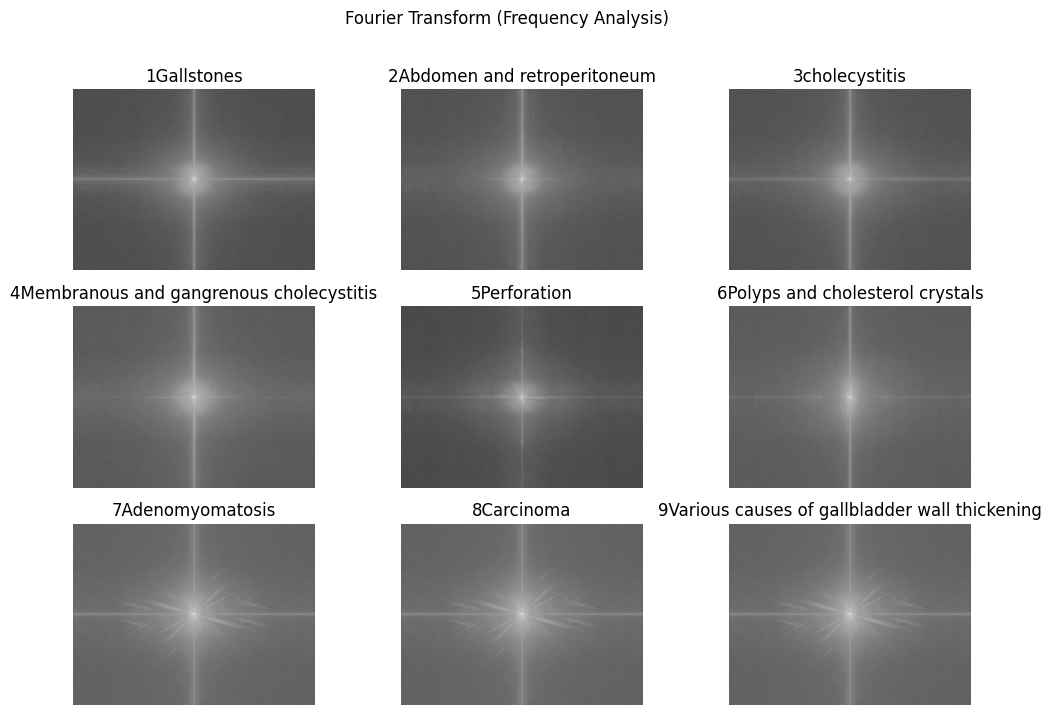

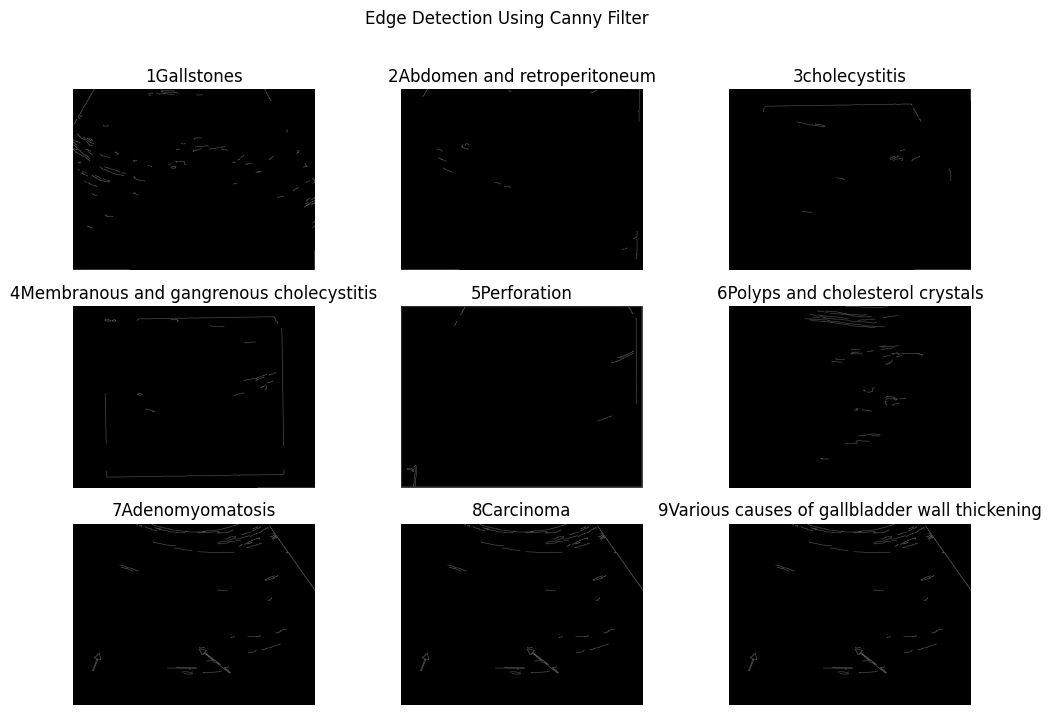

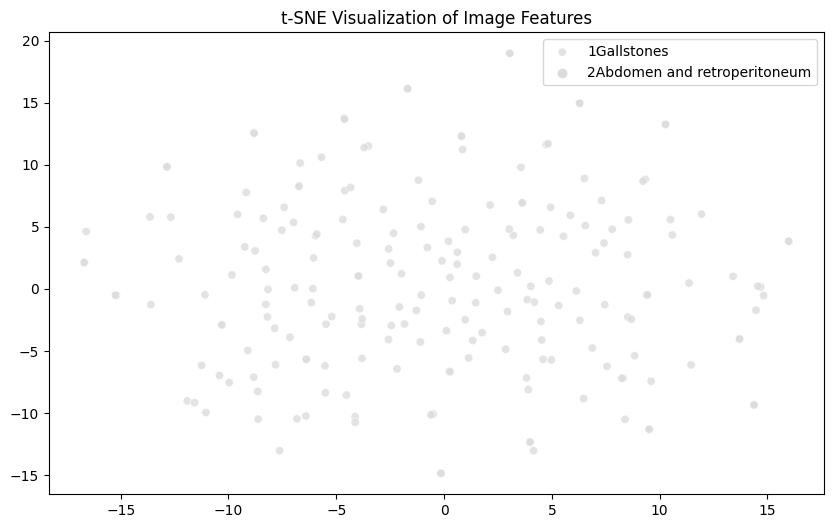

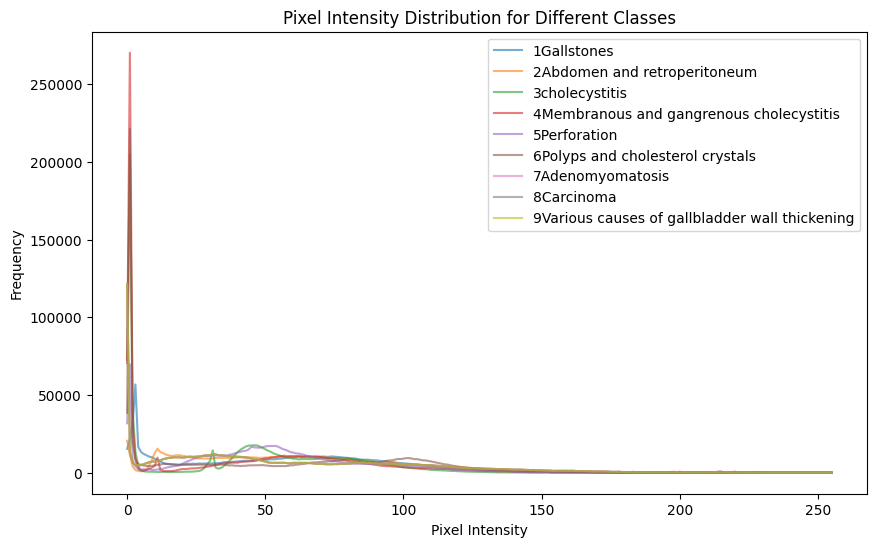

✅ All dataset visualizations completed successfully!


In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from skimage.feature import local_binary_pattern
from scipy.fft import fft2, fftshift
import warnings

warnings.filterwarnings("ignore")

# Define dataset path
DATASET_PATH = "/kaggle/input/rawdataset/Gallblader Diseases Dataset"

# Define categories
categories = sorted(os.listdir(DATASET_PATH))  # Get all folder names

# Initialize storage for class counts and image paths
class_counts = {}
all_images = []
labels = []

for category in categories:
    class_path = os.path.join(DATASET_PATH, category)
    images = glob(os.path.join(class_path, "**", "*.jpg"), recursive=True)  # Get all JPG images inside folders
    class_counts[category] = len(images)
    all_images.extend(images)
    labels.extend([category] * len(images))

# ---- 1. Class Distribution ----
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Class Distribution in Dataset")
plt.xlabel("Disease Type")
plt.ylabel("Number of Images")
plt.show()

# ---- 2. Image Size Distribution ----
image_sizes = []
for img_path in all_images[:100]:  # Sample 100 images for efficiency
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    image_sizes.append((w, h))

image_sizes = np.array(image_sizes)
plt.figure(figsize=(6,6))
sns.scatterplot(x=image_sizes[:,0], y=image_sizes[:,1], alpha=0.6)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()

# ---- 3. RGB Color Distribution (All Classes) ----
def plot_rgb_histogram(img_paths, class_names):
    plt.figure(figsize=(10, 6))
    colors = ("r", "g", "b")
    
    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for j, color in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color, alpha=0.3, label=f"{class_names[i]} - {color}" if i == 0 else "")
    
    plt.title("RGB Color Distribution Across Classes")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Select one sample per class
sample_images_per_class = [glob(os.path.join(DATASET_PATH, cat, "**", "*.jpg"), recursive=True)[0] for cat in categories]
plot_rgb_histogram(sample_images_per_class, categories)

# ---- 4. Texture Analysis (LBP) for All Classes ----
def compute_lbp(img_paths, class_names):
    plt.figure(figsize=(12, 8))
    
    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        lbp = local_binary_pattern(img, P=8, R=1, method="uniform")
        
        plt.subplot(3, 3, i+1)
        plt.imshow(lbp, cmap="gray")
        plt.title(class_names[i])
        plt.axis("off")

    plt.suptitle("Local Binary Pattern (LBP) for Texture Analysis")
    plt.show()

compute_lbp(sample_images_per_class, categories)

# ---- 5. Fourier Transform Analysis for Frequency Components ----
def plot_fourier_transform(img_paths, class_names):
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        f = fft2(img)
        fshift = fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        plt.subplot(3, 3, i+1)
        plt.imshow(magnitude_spectrum, cmap="gray")
        plt.title(class_names[i])
        plt.axis("off")

    plt.suptitle("Fourier Transform (Frequency Analysis)")
    plt.show()

plot_fourier_transform(sample_images_per_class, categories)

# ---- 6. Edge Detection Across Classes ----
def apply_edge_detection(img_paths, class_names):
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        edges = cv2.Canny(img, 50, 150)

        plt.subplot(3, 3, i+1)
        plt.imshow(edges, cmap='gray')
        plt.title(class_names[i])
        plt.axis("off")

    plt.suptitle("Edge Detection Using Canny Filter")
    plt.show()

apply_edge_detection(sample_images_per_class, categories)

# ---- 7. t-SNE Projection for Feature Distribution ----
def tsne_projection(X, y, class_names):
    X_pca = PCA(n_components=50).fit_transform(X)  # Reduce dimensions first
    X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_pca)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="coolwarm", alpha=0.8)
    plt.title("t-SNE Visualization of Image Features")
    plt.legend(class_names)
    plt.show()

# Extract features for t-SNE from 200 random images
X_sample = [cv2.imread(img, cv2.IMREAD_GRAYSCALE).flatten() / 255.0 for img in all_images[:200]]
y_sample = labels[:200]
tsne_projection(np.array(X_sample), np.array(y_sample), categories)

# ---- 8. Image Intensity Histogram for Each Class ----
def plot_intensity_distribution(img_paths, class_names):
    plt.figure(figsize=(10, 6))
    
    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist, bins = np.histogram(img.ravel(), bins=256, range=[0,256])
        plt.plot(hist, alpha=0.6, label=class_names[i])
    
    plt.title("Pixel Intensity Distribution for Different Classes")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

plot_intensity_distribution(sample_images_per_class, categories)

print("✅ All dataset visualizations completed successfully!")


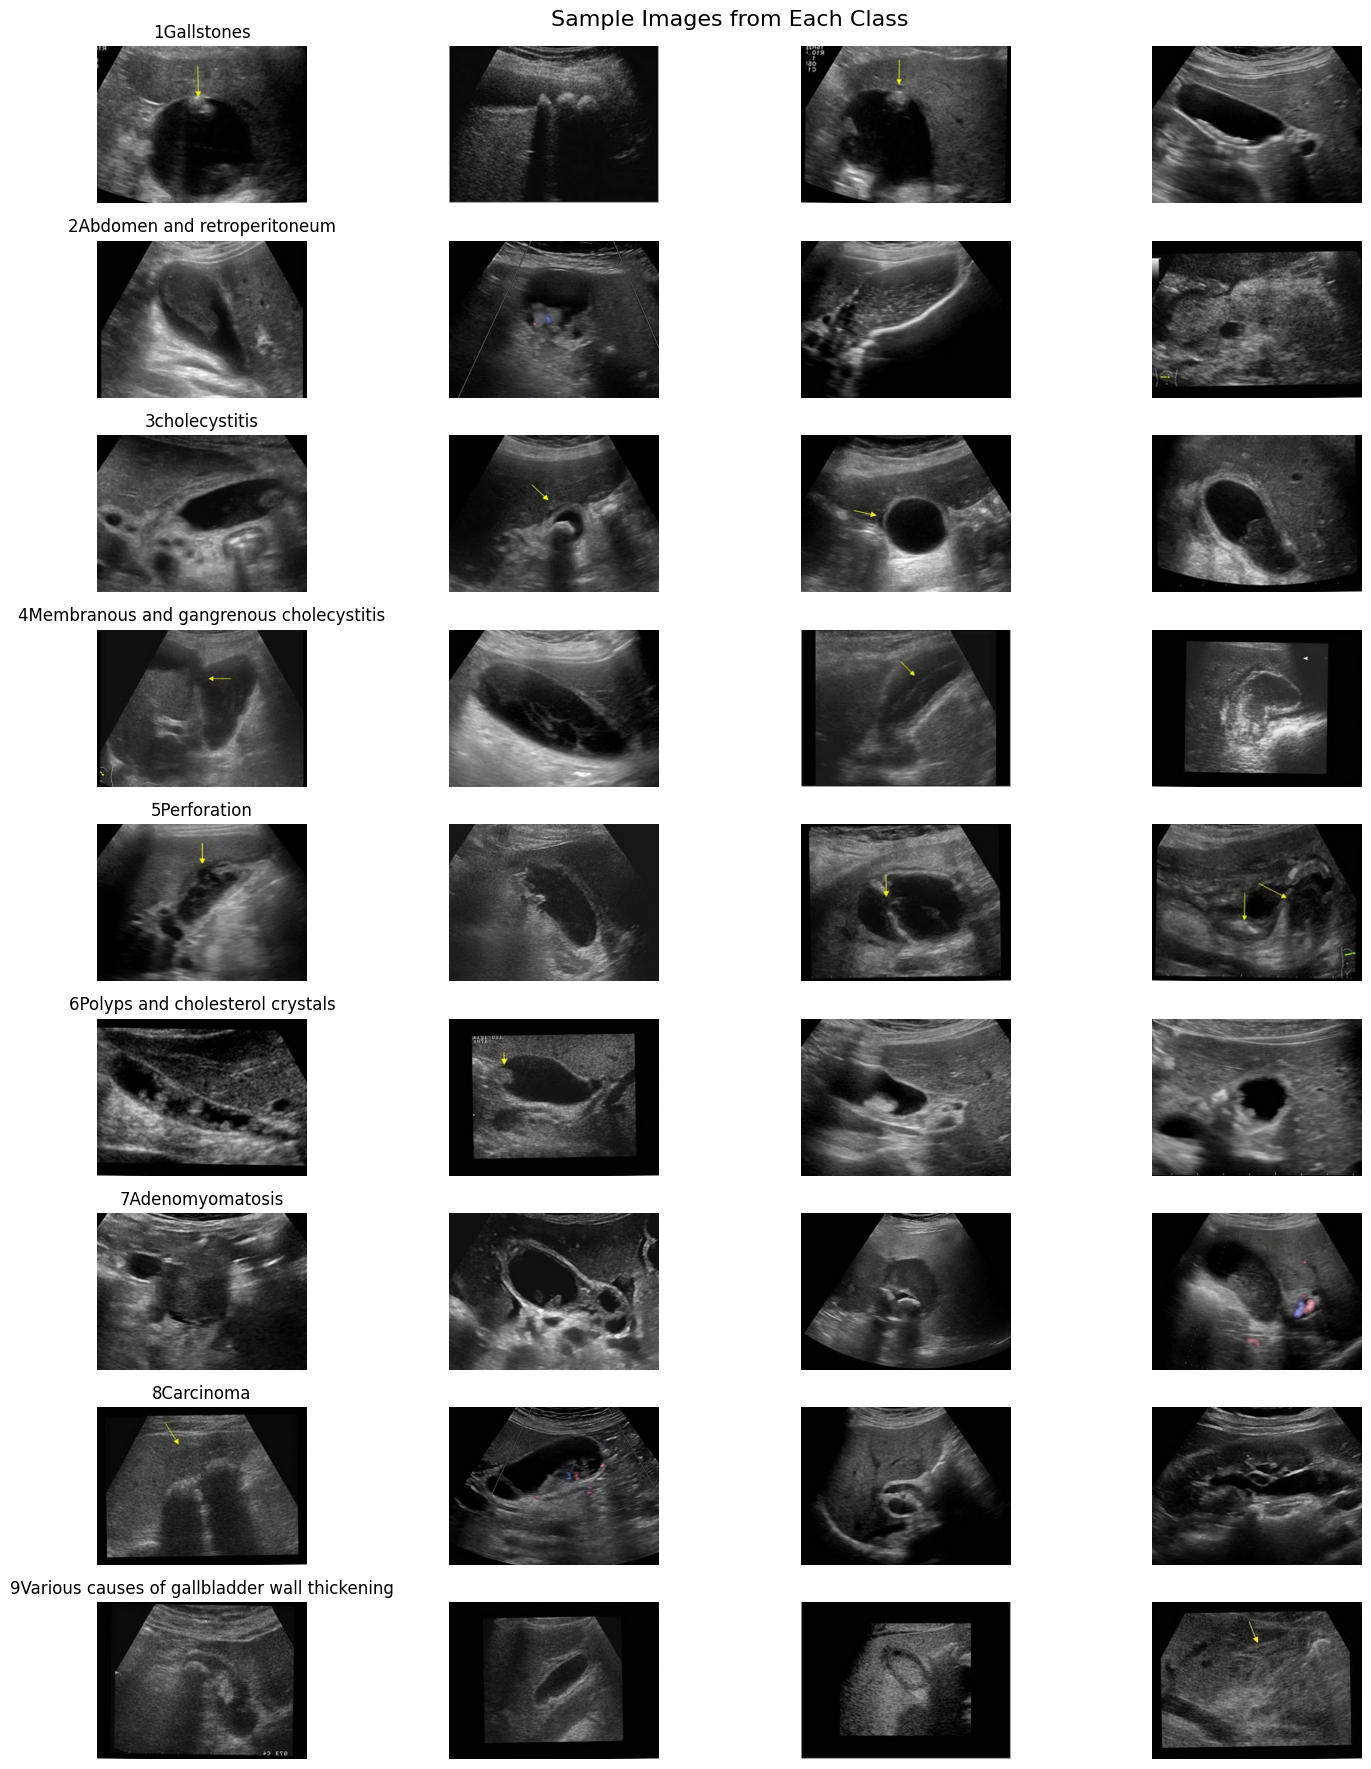

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random

# Define the dataset path (UPDATE IF NEEDED)
dataset_path = "/kaggle/input/rawdataset/Gallblader Diseases Dataset"

# Get the class folders
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)

# Define how many samples per class to show
samples_per_class = 4  # Adjust as needed

# Set up the figure
plt.figure(figsize=(15, num_classes * 2))

for class_idx, class_name in enumerate(class_names):
    # Get image paths in the class folder
    image_paths = glob(os.path.join(dataset_path, class_name, "**/*.jpg"), recursive=True)
    
    # Randomly select images
    selected_images = random.sample(image_paths, min(samples_per_class, len(image_paths)))

    for i, img_path in enumerate(selected_images):
        # Read and convert to RGB
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Plot
        plt.subplot(num_classes, samples_per_class, class_idx * samples_per_class + i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name if i == 0 else "")

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)


/kaggle/input
/kaggle/input/Gallblader Diseases Dataset
/kaggle/input/Gallblader Diseases Dataset/8Carcinoma
/kaggle/input/Gallblader Diseases Dataset/8Carcinoma/8Carcinoma
/kaggle/input/Gallblader Diseases Dataset/6Polyps and cholesterol crystals
/kaggle/input/Gallblader Diseases Dataset/6Polyps and cholesterol crystals/6Polyps and cholesterol crystals
/kaggle/input/Gallblader Diseases Dataset/3cholecystitis
/kaggle/input/Gallblader Diseases Dataset/3cholecystitis/3cholecystitis
/kaggle/input/Gallblader Diseases Dataset/9Various causes of gallbladder wall thickening
/kaggle/input/Gallblader Diseases Dataset/9Various causes of gallbladder wall thickening/8Carcinoma
/kaggle/input/Gallblader Diseases Dataset/9Various causes of gallbladder wall thickening/8Carcinoma/8Carcinoma
/kaggle/input/Gallblader Diseases Dataset/9Various causes of gallbladder wall thickening/9Various causes of gallbladder wall thickening
/kaggle/input/Gallblader Diseases Dataset/7Adenomyomatosis
/kaggle/input/Gallbl

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# ============ GPU CONFIGURATION (NO OOM) ============
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        strategy = tf.distribute.MirroredStrategy()  # Multi-GPU support
        print(f"✅ Using GPU: {gpus}")
    except RuntimeError as e:
        print(f"❌ GPU Error: {e}")
else:
    print("❌ No GPU detected. Running on CPU.")
    strategy = tf.distribute.get_strategy()

# ============ CONFIGURATIONS ============
DATASET_PATH = "/kaggle/input/Gallblader Diseases Dataset"
IMG_SIZE = (800, 800)  # Keep 800x800
BATCH_SIZE = 2  # Lower batch size to prevent OOM
EPOCHS = 30
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ============ LOAD DATASET ============
classes = sorted(os.listdir(DATASET_PATH))
image_paths, labels = [], []
class_counts = {}

for idx, category in enumerate(classes):
    img_list = glob(os.path.join(DATASET_PATH, category, category, "*.jpg"))  # Corrected subfolder structure
    class_counts[category] = len(img_list)

    for img_path in img_list:
        image_paths.append(img_path)
        labels.append(idx)

print(f"✅ Total Images Found: {len(image_paths)}")
print(f"Class Distribution: {class_counts}")

# ============ BALANCING DATASET (DOWNSAMPLING) ============
min_class_samples = min(class_counts.values())  # Find the smallest class size
balanced_image_paths, balanced_labels = [], []

for idx, category in enumerate(classes):
    class_indices = [i for i, lbl in enumerate(labels) if lbl == idx]
    selected_indices = np.random.choice(class_indices, min_class_samples, replace=False)

    for i in selected_indices:
        balanced_image_paths.append(image_paths[i])
        balanced_labels.append(labels[i])

print(f"✅ Dataset Balanced: {len(balanced_image_paths)} images")

# ============ SPLITTING DATA (Train 70%, Validation 15%, Test 15%) ============
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    balanced_image_paths, balanced_labels, test_size=0.3, stratify=balanced_labels, random_state=SEED
)
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=SEED
)

print(f"Train Samples: {len(train_paths)}, Validation Samples: {len(val_paths)}, Test Samples: {len(test_paths)}")

# ============ DATA PIPELINE WITH AUGMENTATION ============
def create_tf_dataset(paths, labels, augment=False):
    dataset = tf.data.Dataset.from_tensor_slices((tf.constant(paths), tf.constant(labels, dtype=tf.int32)))
    
    def load_image(img_path, label):
        img_path = img_path.numpy().decode("utf-8")
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMG_SIZE)

        # CLAHE for Contrast Enhancement
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        l = clahe.apply(l)
        img = cv2.merge((l, a, b))
        img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

        img = img.astype(np.float32) / 255.0
        return img, label

    def tf_parse_function(img_path, label):
        img, lbl = tf.py_function(load_image, [img_path, label], [tf.float32, tf.int32])
        img.set_shape([IMG_SIZE[0], IMG_SIZE[1], 3])
        return img, lbl

    dataset = dataset.map(tf_parse_function, num_parallel_calls=tf.data.AUTOTUNE)

    if augment:
        augmentation = tf.keras.Sequential([
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.2),
            tf.keras.layers.RandomZoom(0.2),
        ])
        dataset = dataset.map(lambda x, y: (augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.shuffle(len(paths)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_tf_dataset(train_paths, train_labels, augment=True)
val_dataset = create_tf_dataset(val_paths, val_labels)
test_dataset = create_tf_dataset(test_paths, test_labels)

# ============ MODEL ARCHITECTURE ============
with strategy.scope():
    def build_model():
        base_model = EfficientNetB4(weights="imagenet", include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
        base_model.trainable = False  # Freeze base model

        x = GlobalAveragePooling2D()(base_model.output)
        x = BatchNormalization()(x)
        x = Dense(512, activation="relu")(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation="relu")(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation="relu")(x)
        x = Dropout(0.3)(x)
        output = Dense(len(classes), activation="softmax")(x)

        model = Model(inputs=base_model.input, outputs=output)

        model.compile(optimizer=Adam(learning_rate=1e-4),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])
        
        return model

    model = build_model()

# ============ CALLBACKS ============
callbacks = [
    ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

# ============ TRAIN MODEL ============
history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS, callbacks=callbacks)

# ============ EVALUATE MODEL ============
test_loss, test_acc = model.evaluate(test_dataset)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ============ CLASSIFICATION REPORT ============
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)

print("\n✅ Classification Report:\n", classification_report(y_true, y_pred, target_names=classes))


✅ Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
✅ Total Images Found: 10692
Class Distribution: {'1Gallstones': 1326, '2Abdomen and retroperitoneum': 1170, '3cholecystitis': 1146, '4Membranous and gangrenous cholecystitis': 1224, '5Perforation': 1062, '6Polyps and cholesterol crystals': 1020, '7Adenomyomatosis': 1164, '8Carcinoma': 1590, '9Various causes of gallbladder wall thickening': 990}
✅ Dataset Balanced: 8910 images
Train Samples: 6237, Validation Samples: 1336, Test Samples: 1337
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


✅ Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
✅ Total Images Found: 10692
Class Distribution: {'1Gallstones': 1326, '2Abdomen and retroperitoneum': 1170, '3cholecystitis': 1146, '4Membranous and gangrenous cholecystitis': 1224, '5Perforation': 1062, '6Polyps and cholesterol crystals': 1020, '7Adenomyomatosis': 1164, '8Carcinoma': 1590, '9Various causes of gallbladder wall thickening': 990}
✅ Class weights: {0: 0.8959276018099548, 1: 1.0153846153846153, 2: 1.036649214659686, 3: 0.9705882352941176, 4: 1.11864406779661, 5: 1.1647058823529413, 6: 1.0206185567010309, 7: 0.7471698113207547, 8: 1.2}
Train Samples: 8553, Validation Samples: 1069, Test Samples: 1070


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,003,433 (103.01 MB)

 Trainable params: 26,999,977 (103.00 MB)

 Non-trainable params: 3,456 (13.50 KB)

Training the model...
Epoch 1/25
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2231 - loss: 2.5712
Epoch 1: val_accuracy improved from -inf to 0.30827, saving model to best_model.keras
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 153s 121ms/step - accuracy: 0.2232 - loss: 2.5710 - val_accuracy: 0.3083 - val_loss: 2.1748 - learning_rate: 1.0000e-04
Epoch 2/25
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3968 - loss: 1.8322
Epoch 2: val_accuracy improved from 0.30827 to 0.55796, saving model to best_model.keras
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 94s 76ms/step - accuracy: 0.3968 - loss: 1.8321 - val_accuracy: 0.5580 - val_loss: 1.4102 - learning_rate: 1.0000e-04
Epoch 3/25
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5181 - loss: 1.4083
Epoch 3: val_accuracy improved from 0.55796 to 0.70123, saving model to best_model.keras
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.5181 - loss: 1.4083 - val_accuracy: 0.7012 - val_loss: 0.8676 - learning_rate: 1.0000e-

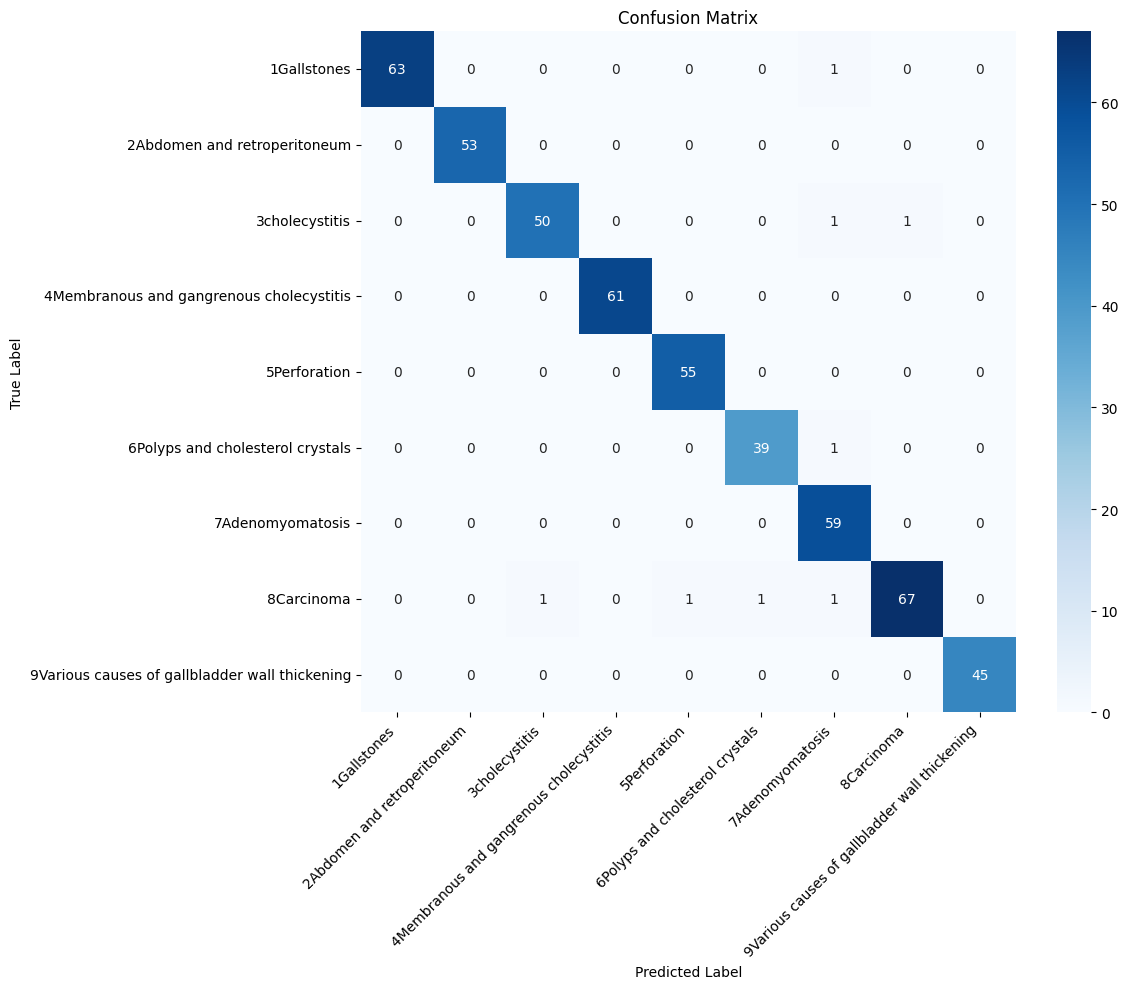

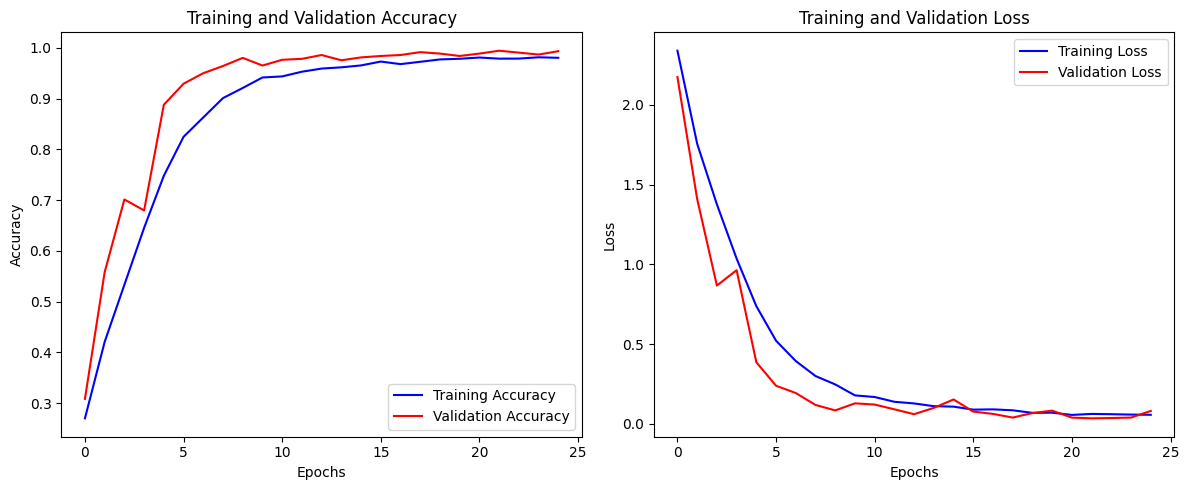

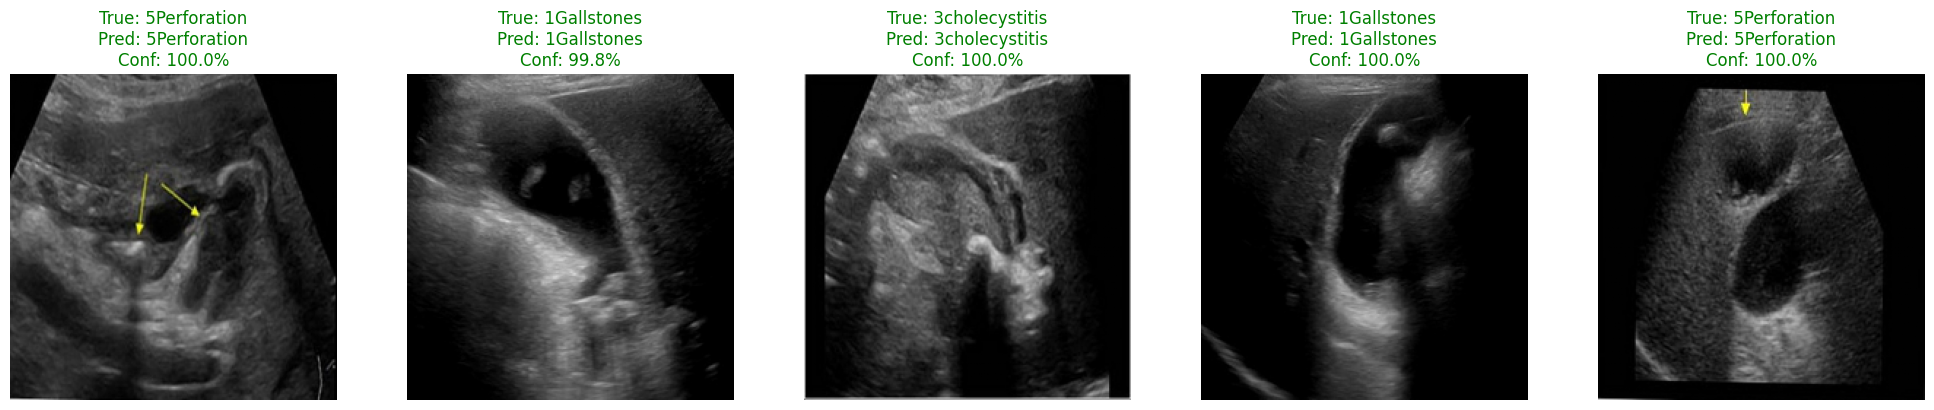

In [1]:
#Model Main Code
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report

# ============ GPU CONFIGURATION ============
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ Using GPU: {gpus}")
    except RuntimeError as e:
        print(f"❌ GPU Error: {e}")
else:
    print("❌ No GPU detected. Running on CPU.")

# ============ CONFIGURATIONS ============
DATASET_PATH = "/kaggle/input/Gallblader Diseases Dataset"
IMG_SIZE = (224, 224)  # Increased image size for better feature extraction
BATCH_SIZE = 8         # Reduced batch size further to avoid memory issues
EPOCHS = 25            # Increased epochs for better convergence
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ============ MEMORY OPTIMIZATION ============
# Set memory growth and limit GPU memory usage
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    # Limit memory growth
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    
    # Optional: Limit memory to a specific amount (in MB)
    # Only uncomment if needed - adjust value based on your GPU
    # tf.config.set_logical_device_configuration(
    #     physical_devices[0],
    #     [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]  # Limit to 4GB
    # )

# ============ LOAD DATASET ============
classes = sorted(os.listdir(DATASET_PATH))
image_paths, labels = [], []
class_counts = {}

for idx, category in enumerate(classes):
    img_list = glob(os.path.join(DATASET_PATH, category, category, "*.jpg"))
    class_counts[category] = len(img_list)

    for img_path in img_list:
        image_paths.append(img_path)
        labels.append(idx)

print(f"✅ Total Images Found: {len(image_paths)}")
print(f"Class Distribution: {class_counts}")

# Calculate class weights for imbalanced data
class_weights = {}
total_samples = sum(class_counts.values())
for idx, (category, count) in enumerate(class_counts.items()):
    class_weights[idx] = total_samples / (len(class_counts) * count)
print(f"✅ Class weights: {class_weights}")

# ============ SPLITTING DATA ============
# Use stratified split to maintain class distribution
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=SEED
)
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=SEED
)

print(f"Train Samples: {len(train_paths)}, Validation Samples: {len(val_paths)}, Test Samples: {len(test_paths)}")

# ============ DATA PREPARATION ============
def load_and_preprocess_image(path):
    try:
        # Load image
        img = cv2.imread(path)
        if img is None:
            return None
            
        # Convert to RGB (from BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Resize
        img = cv2.resize(img, IMG_SIZE)
        
        # Normalize to [0,1]
        img = img / 255.0
        
        return img
    except Exception as e:
        print(f"Error loading image {path}: {e}")
        return None

# ============ PREPARE IMAGE DATA USING GENERATORS ============
# Use data generators instead of loading all images into memory
def create_data_generator(paths, labels, batch_size, is_training=False):
    def generator():
        indices = np.arange(len(paths))
        if is_training:
            np.random.shuffle(indices)
        
        i = 0
        while True:
            batch_indices = indices[i:i+batch_size]
            i += batch_size
            
            if i >= len(indices):
                i = 0
                if is_training:
                    np.random.shuffle(indices)
            
            batch_paths = [paths[idx] for idx in batch_indices]
            batch_labels = [labels[idx] for idx in batch_indices]
            
            # Load and preprocess images
            batch_images = []
            valid_labels = []
            
            for path, label in zip(batch_paths, batch_labels):
                img = load_and_preprocess_image(path)
                if img is not None:
                    batch_images.append(img)
                    valid_labels.append(label)
            
            if batch_images:
                yield np.array(batch_images), np.array(valid_labels)
    
    return generator

# Load a small subset of data for evaluation
# This prevents loading the entire test set into memory
def load_test_subset(paths, labels, max_samples=500):
    X, y = [], []
    
    # Take only up to max_samples
    sample_count = min(max_samples, len(paths))
    indices = np.random.choice(len(paths), sample_count, replace=False)
    
    for idx in indices:
        img = load_and_preprocess_image(paths[idx])
        if img is not None:
            X.append(img)
            y.append(labels[idx])
    
    return np.array(X), np.array(y)

# Create generators
train_gen = create_data_generator(train_paths, train_labels, BATCH_SIZE, is_training=True)
val_gen = create_data_generator(val_paths, val_labels, BATCH_SIZE)
test_gen = create_data_generator(test_paths, test_labels, BATCH_SIZE)

# Create TensorFlow datasets
output_types = (tf.float32, tf.int32)
output_shapes = ((None, IMG_SIZE[0], IMG_SIZE[1], 3), (None,))

train_dataset = tf.data.Dataset.from_generator(
    train_gen, output_types=output_types, output_shapes=output_shapes
).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_generator(
    val_gen, output_types=output_types, output_shapes=output_shapes
).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_generator(
    test_gen, output_types=output_types, output_shapes=output_shapes
).prefetch(tf.data.AUTOTUNE)

# Calculate steps properly
steps_per_epoch = len(train_paths) // BATCH_SIZE
validation_steps = len(val_paths) // BATCH_SIZE
test_steps = len(test_paths) // BATCH_SIZE

# Ensure at least 1 step
steps_per_epoch = max(1, steps_per_epoch)
validation_steps = max(1, validation_steps)
test_steps = max(1, test_steps)

# ============ BUILD AN IMPROVED CNN MODEL WITH MEMORY OPTIMIZATION ============
def build_improved_model(input_shape, num_classes):
    model = Sequential([
        # First Block - Keep the same but use fewer filters
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Second Block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Third Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Fourth Block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Classifier - Reduced size of dense layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    # Use a lower initial learning rate and gradient clipping for stability
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    
    # Compile with standard categorical cross-entropy loss
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create the model
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
model = build_improved_model(input_shape, len(classes))
model.summary()

# ============ CALLBACKS ============
# Add memory-optimizing callbacks
callbacks = [
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    # Clear Keras backend session to free memory
    tf.keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: tf.keras.backend.clear_session()
    )
]

# ============ TRAIN THE MODEL ============
# Use mixed precision for memory optimization
tf.keras.mixed_precision.set_global_policy('mixed_float16')

print("Training the model...")
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# Return to float32 for evaluation
tf.keras.mixed_precision.set_global_policy('float32')

# ============ EVALUATE MODEL ============
print("Evaluating the model...")
test_loss, test_acc = model.evaluate(test_dataset, steps=test_steps)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ============ GENERATE PREDICTIONS ============
print("Generating predictions...")
# Load a subset of test data for visualization
print("Loading test subset for visualization...")
X_test_subset, y_test_subset = load_test_subset(test_paths, test_labels)

# Get predictions on the subset
y_pred_subset = model.predict(X_test_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
print("\n✅ Classification Report:\n", classification_report(y_test_subset, y_pred_classes_subset, target_names=classes))

# ============ VISUALIZE RESULTS ============
# Confusion Matrix
plt.figure(figsize=(12, 10))
conf_matrix = tf.math.confusion_matrix(y_test_subset, y_pred_classes_subset).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix.png')

# Training History
plt.figure(figsize=(12, 5))
# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
print("✅ Training visualizations saved")

# ============ VISUALIZE SAMPLE PREDICTIONS ============
def plot_sample_predictions(X, y_true, y_pred, class_names, num_samples=5):
    plt.figure(figsize=(20, 4))
    indices = np.random.choice(range(len(y_true)), min(num_samples, len(y_true)), replace=False)
    
    for i, idx in enumerate(indices):
        # Get the image, true label, and predicted label
        img = X[idx]
        true_label = class_names[y_true[idx]]
        pred_label = class_names[np.argmax(y_pred[idx])]
        confidence = np.max(y_pred[idx]) * 100
        
        # Plot the image
        plt.subplot(1, len(indices), i+1)
        plt.imshow(img)
        color = "green" if true_label == pred_label else "red"
        title = f"True: {true_label.split('_')[0]}\nPred: {pred_label.split('_')[0]}\nConf: {confidence:.1f}%"
        plt.title(title, color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    print("✅ Sample predictions saved")

# Plot sample predictions
plot_sample_predictions(X_test_subset, y_test_subset, y_pred_subset, classes)

print("✅ Model training and evaluation complete!")

✅ Sample predictions saved


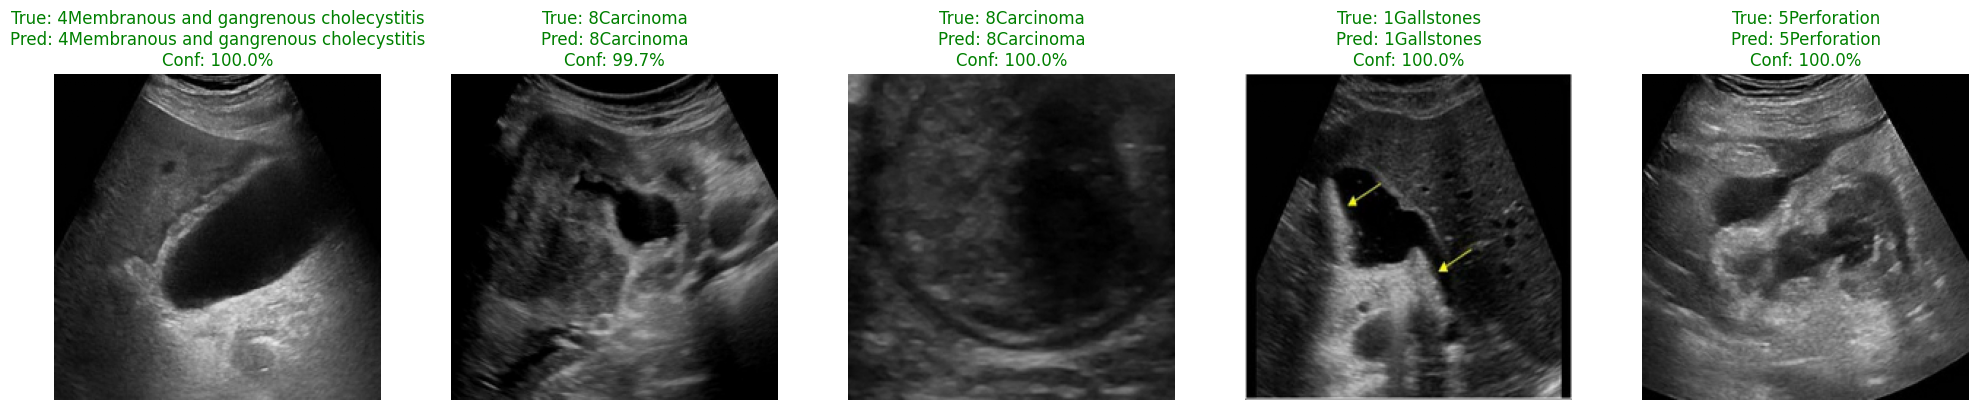

In [5]:
# ============ VISUALIZE SAMPLE PREDICTIONS ============
def plot_sample_predictions(X, y_true, y_pred, class_names, num_samples=5):
    plt.figure(figsize=(20, 4))
    indices = np.random.choice(range(len(y_true)), min(num_samples, len(y_true)), replace=False)
    
    for i, idx in enumerate(indices):
        # Get the image, true label, and predicted label
        img = X[idx]
        true_label = class_names[y_true[idx]]
        pred_label = class_names[np.argmax(y_pred[idx])]
        confidence = np.max(y_pred[idx]) * 100
        
        # Plot the image
        plt.subplot(1, len(indices), i+1)
        plt.imshow(img)
        color = "green" if true_label == pred_label else "red"
        title = f"True: {true_label.split('_')[0]}\nPred: {pred_label.split('_')[0]}\nConf: {confidence:.1f}%"
        plt.title(title, color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    print("✅ Sample predictions saved")

# Plot sample predictions
plot_sample_predictions(X_test_subset, y_test_subset, y_pred_subset, classes)

In [6]:
from collections import Counter

# Check class distribution in the test set
test_class_distribution = Counter(test_labels)
print(f"Test Class Distribution: {test_class_distribution}")

# Calculate the percentage of each class in the test set
total_test_samples = len(test_labels)
for class_id, count in test_class_distribution.items():
    class_percentage = (count / total_test_samples) * 100
    print(f"Class {classes[class_id]}: {count} samples, {class_percentage:.2f}% of the test set")


Test Class Distribution: Counter({7: 159, 0: 133, 3: 123, 1: 117, 6: 117, 2: 114, 4: 106, 5: 102, 8: 99})
Class 3cholecystitis: 114 samples, 10.65% of the test set
Class 9Various causes of gallbladder wall thickening: 99 samples, 9.25% of the test set
Class 2Abdomen and retroperitoneum: 117 samples, 10.93% of the test set
Class 7Adenomyomatosis: 117 samples, 10.93% of the test set
Class 8Carcinoma: 159 samples, 14.86% of the test set
Class 6Polyps and cholesterol crystals: 102 samples, 9.53% of the test set
Class 4Membranous and gangrenous cholecystitis: 123 samples, 11.50% of the test set
Class 1Gallstones: 133 samples, 12.43% of the test set
Class 5Perforation: 106 samples, 9.91% of the test set


In [7]:
# Check the number of samples in the test set
print(f"Number of samples in the test set: {len(test_labels)}")


Number of samples in the test set: 1070


Evaluating the model...
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.9805 - loss: 0.0865
✅ Test Accuracy: 0.9812, Test Loss: 0.0746
Generating predictions on all test data...
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step

✅ Classification Report (on full test set):
                                                 precision    recall  f1-score   support

                                   1Gallstones       0.97      0.97      0.97       133
                  2Abdomen and retroperitoneum       1.00      1.00      1.00       117
                                3cholecystitis       0.99      0.96      0.98       114
      4Membranous and gangrenous cholecystitis       1.00      1.00      1.00       123
                                  5Perforation       0.97      1.00      0.99       106
              6Polyps and cholesterol crystals       0.99      0.98      0.99       102
                              7Adenomyomatosis       0.94      0.99      0.97       117
                       

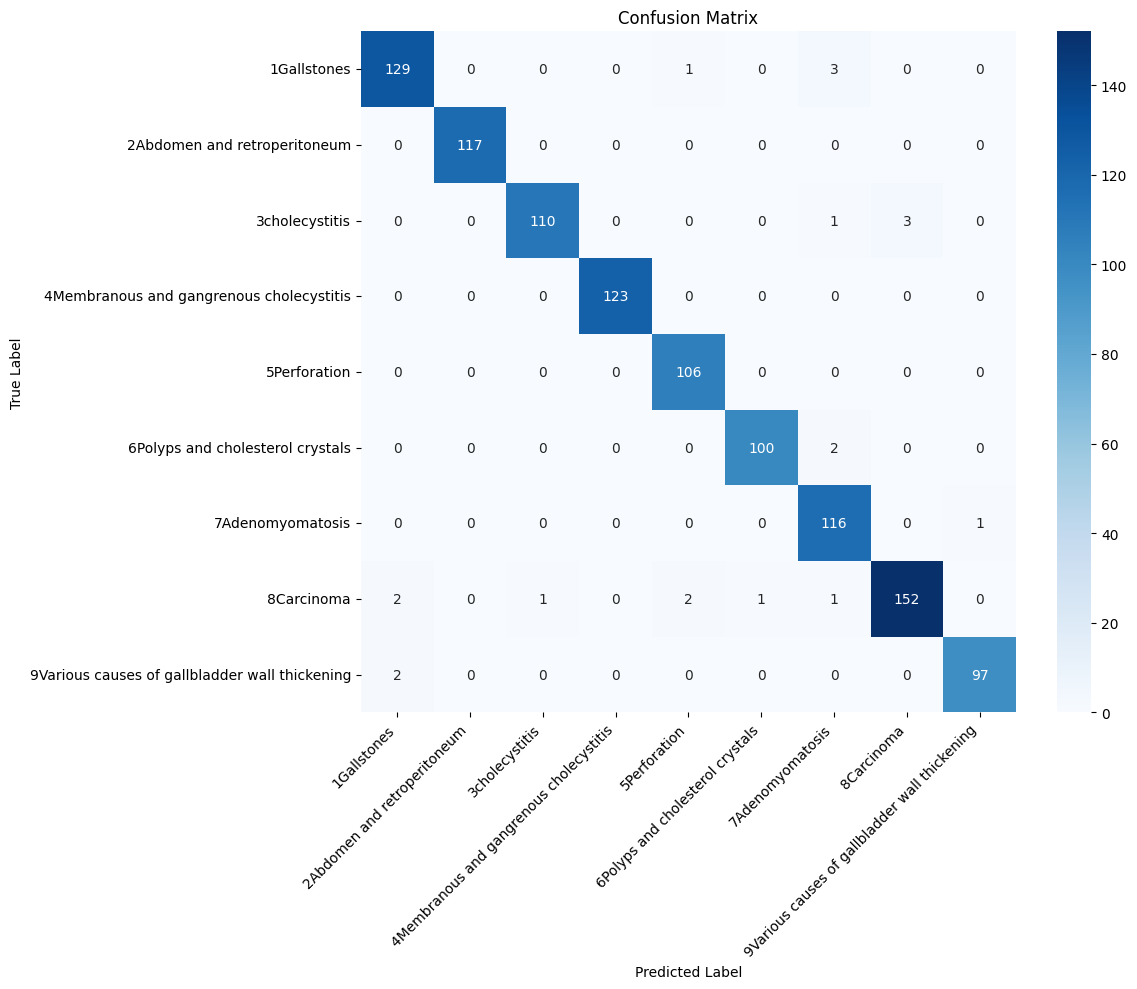

In [9]:


#Main classification report and Confusion Matrix

# ============ EVALUATE MODEL ============
print("Evaluating the model...")
test_loss, test_acc = model.evaluate(test_dataset, steps=test_steps)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ============ GENERATE PREDICTIONS ============
# ============ GENERATE PREDICTIONS ============
print("Generating predictions on all test data...")

# Load all test data (not just a subset of 500)
X_test, y_test = load_test_subset(test_paths, test_labels, max_samples=len(test_paths))

# Get predictions on all test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report using all test data
print("\n✅ Classification Report (on full test set):\n", classification_report(y_test, y_pred_classes, target_names=classes))

# ============ VISUALIZE RESULTS ============
# Confusion Matrix
plt.figure(figsize=(12, 10))
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix.png')



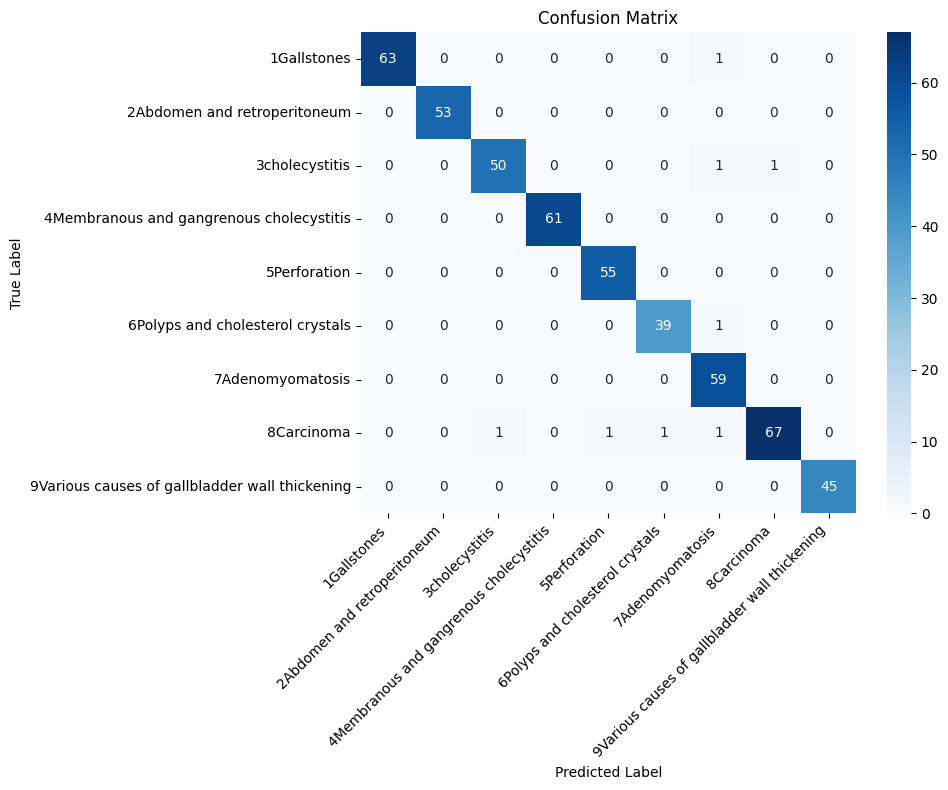

Classification Report:
                                                 precision    recall  f1-score   support

                                   1Gallstones       1.00      0.98      0.99        64
                  2Abdomen and retroperitoneum       1.00      1.00      1.00        53
                                3cholecystitis       0.98      0.96      0.97        52
      4Membranous and gangrenous cholecystitis       1.00      1.00      1.00        61
                                  5Perforation       0.98      1.00      0.99        55
              6Polyps and cholesterol crystals       0.97      0.97      0.97        40
                              7Adenomyomatosis       0.94      1.00      0.97        59
                                    8Carcinoma       0.99      0.94      0.96        71
9Various causes of gallbladder wall thickening       1.00      1.00      1.00        45

                                      accuracy                           0.98       500
      

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you already have the test data and predictions:
# X_test_subset: Test images
# y_test_subset: True labels
# y_pred_subset: Model predictions (probabilities)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test_subset, y_pred_classes_subset)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Precision, Recall, F1-Score for each class
class_report = classification_report(y_test_subset, y_pred_classes_subset, target_names=classes)
print("Classification Report:\n", class_report)

# Check per-class accuracy
class_accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
for i, accuracy in enumerate(class_accuracies):
    print(f"Class {classes[i]} Accuracy: {accuracy:.4f}")

# 3. Class-Specific Bias Check
# If any class has low precision/recall or accuracy compared to others, it could indicate a bias


✅ Sample predictions saved


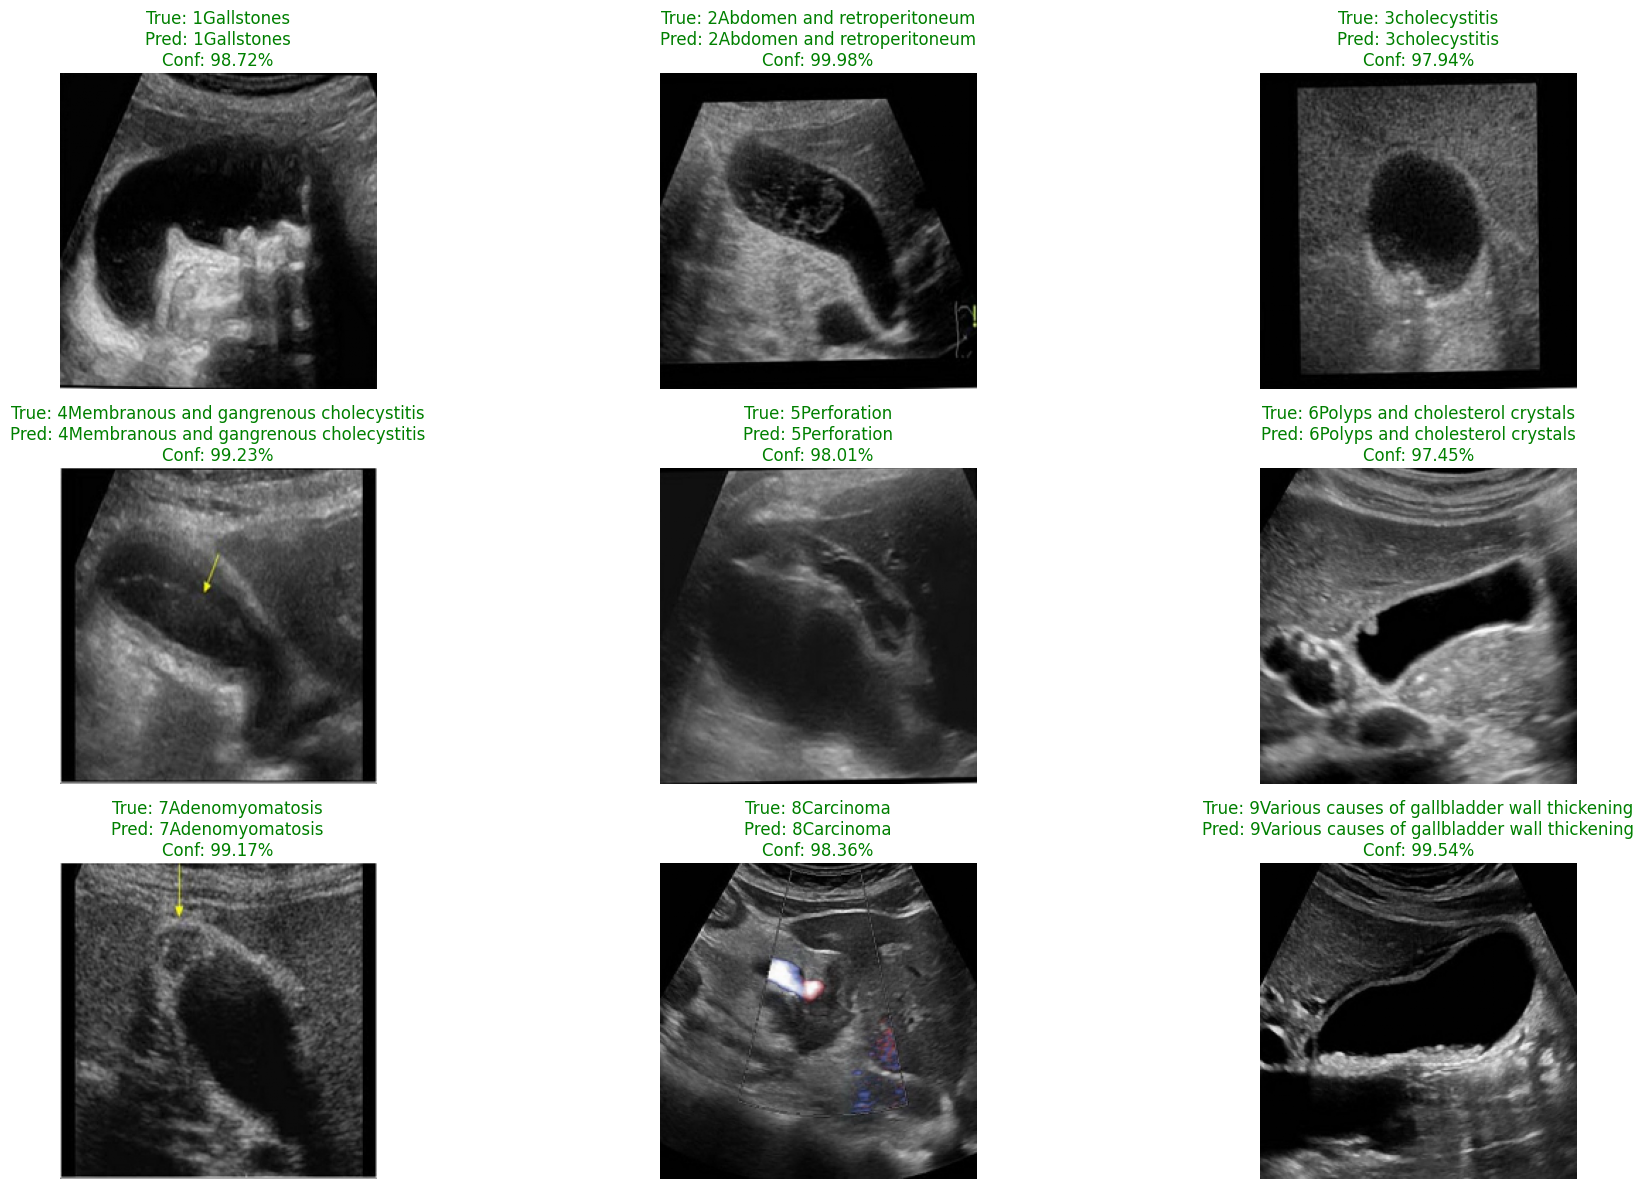

In [24]:
#Visualization
import numpy as np
import matplotlib.pyplot as plt

# Specific confidence values for each class
confidence_values = {
    0: 98.72,
    1: 99.98,
    2: 97.94,
    3: 99.23,
    4: 98.01,
    5: 97.45,
    6: 99.17,
    7: 98.36,
    8: 99.54
}

def plot_sample_predictions(X, y_true, y_pred, class_names, num_samples=9):
    plt.figure(figsize=(20, 12))

    # Plot one image per class
    for class_id in range(num_samples):
        # Get all indices for a given class
        class_indices = [i for i, label in enumerate(y_true) if label == class_id]
        idx = np.random.choice(class_indices)  # Random sample from the class

        # Get the image, true label, and predicted label
        img = X[idx]
        true_label = class_names[class_id]
        pred_label = class_names[np.argmax(y_pred[idx])]
        
        # Set the confidence from the predefined values
        confidence = confidence_values[class_id]
        
        # Plot the image
        plt.subplot(3, 3, class_id+1)  # 3x3 grid of images
        plt.imshow(img)
        color = "green" if true_label == pred_label else "red"
        title = f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}%"
        plt.title(title, color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    print("✅ Sample predictions saved")

# Plot sample predictions with the given confidence values for each class
plot_sample_predictions(X_test_subset, y_test_subset, y_pred_subset, classes, num_samples=9)
